In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from components.HistoryGraph import HistoryGraph
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import warnings
from sklearn.svm import SVC
from components.lib import execute_graph
from components.lib import view_dictionary, graphviz_draw
from components.parser.parser import extract_artifact_graph
from dictionary.Evaluator.Classification.F1_score import F1ScoreCalculator
from dictionary.Preprocessor.PCA.GPU__PCA import GPU__PCA
from dictionary.Preprocessor.PCA.GPU_SS_PCA import GPU_SS_PCA
from dictionary.Preprocessor.PCA.TR__PCA import TR__PCA

warnings.filterwarnings('ignore')

Hyppo = HistoryGraph("History")


<img src="intro.png" alt="image" width="1200" height="auto">

# Pipeline discovery with Hyppo
---

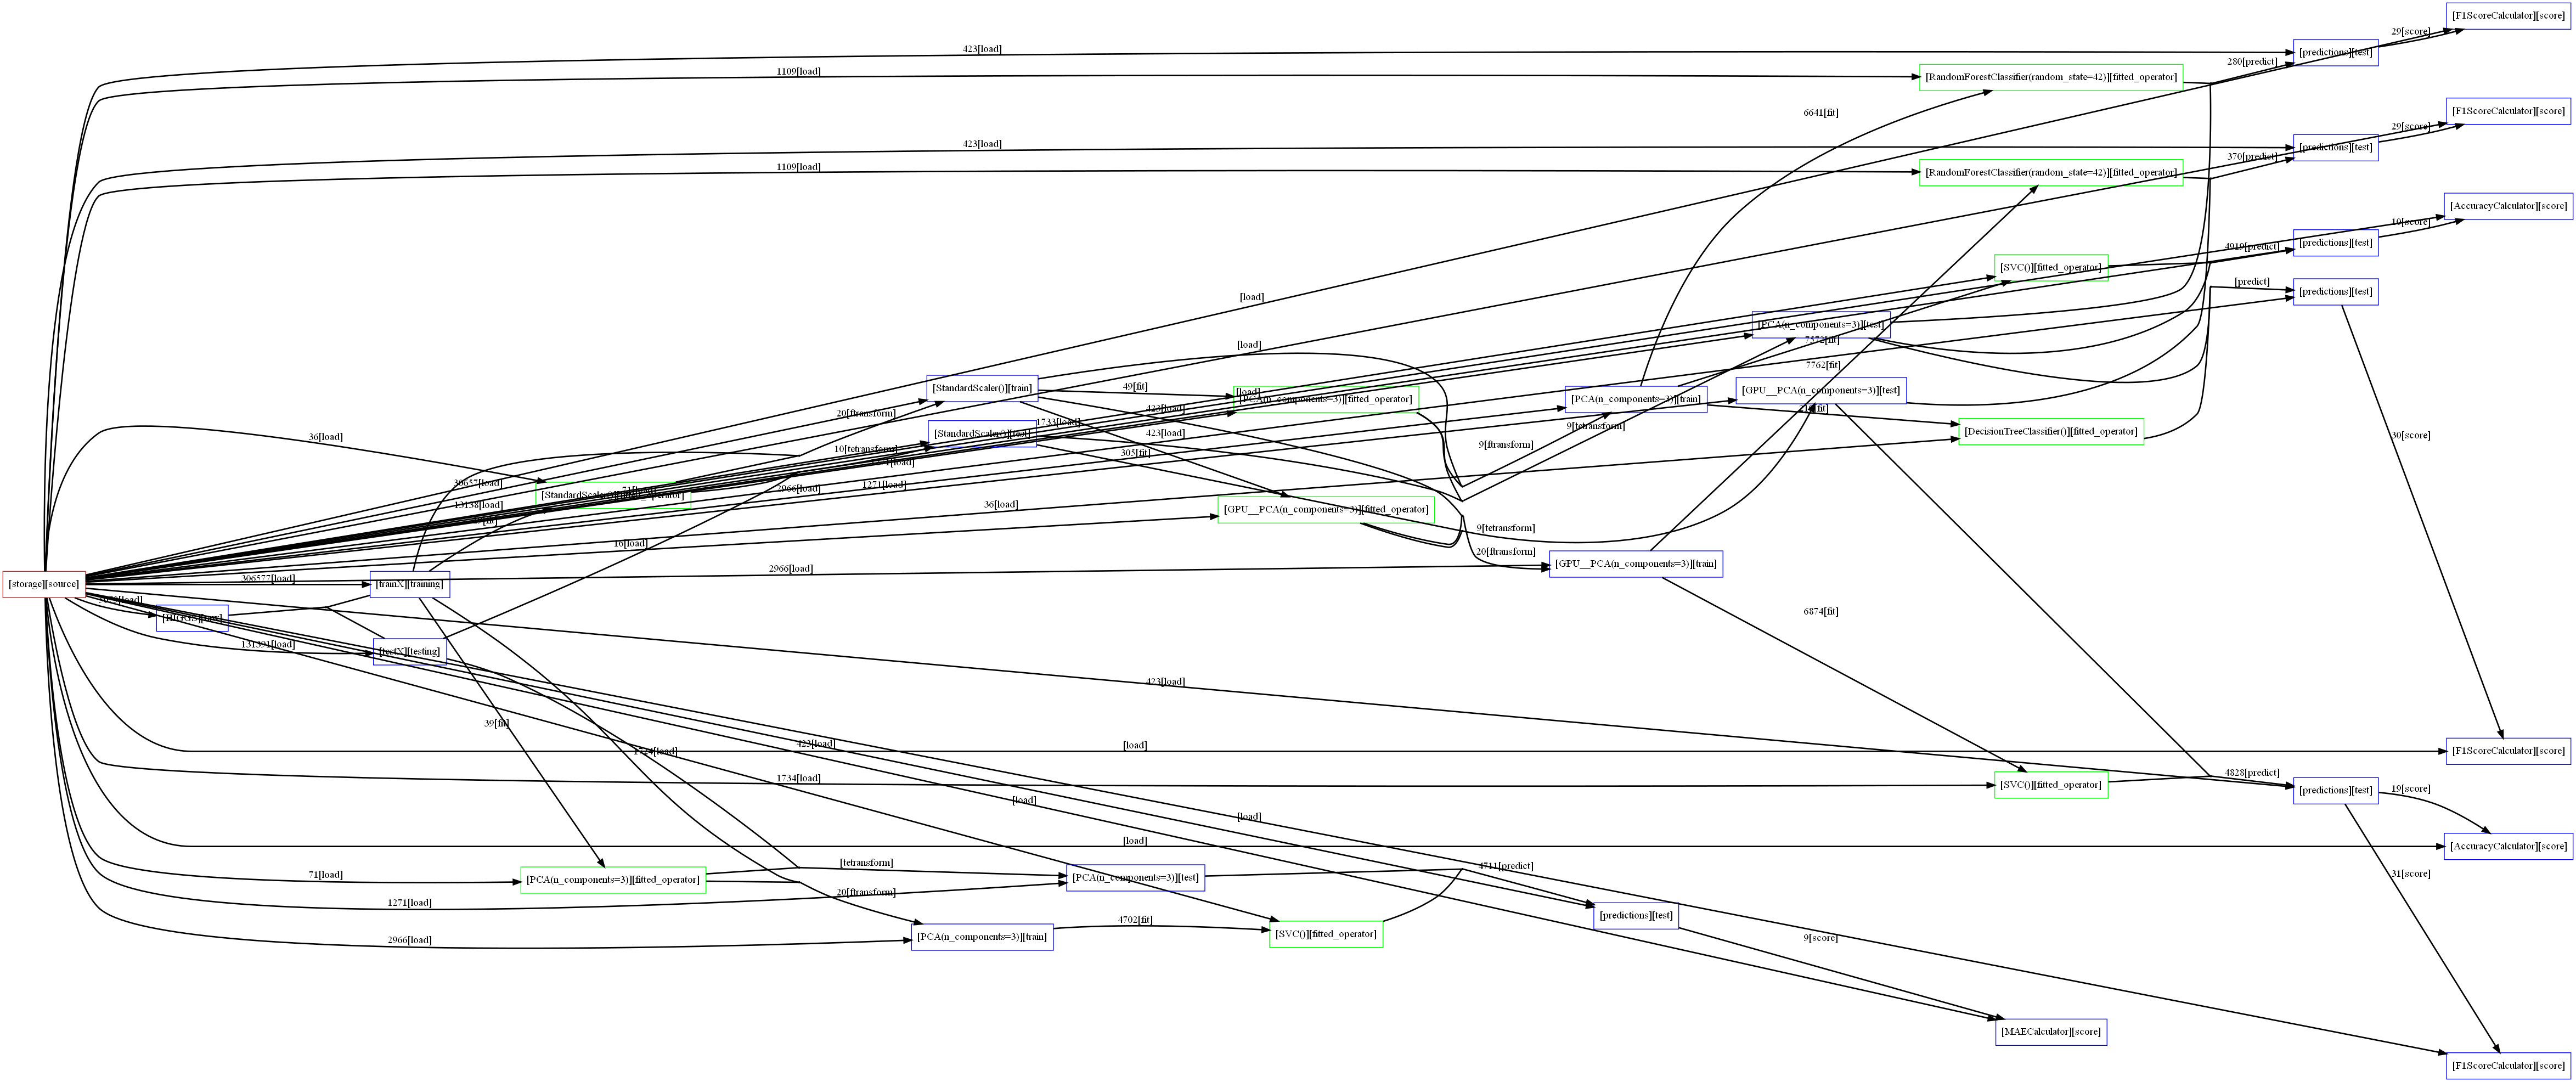

In [2]:
Hyppo.visualize(type='notebook', mode='use_alias')

In [31]:
Hyppo.view_datasets()

,dataset_id,split_ratio
0,HIGGS,0.3


In [3]:
data_id = "HIGGS"

In [4]:
Hyppo.best_metrics_achieved(dataset_id=data_id)

,operator,highest_value,lowest_value
0,F1ScoreCalculator,1.196000,1.151200
1,AccuracyCalculator,0.854333,0.854333
2,MAECalculator,0.150333,0.150333


In [5]:
Hyppo.retrieve_best_pipelines(dataset_id=data_id, metric = "F1ScoreCalculator",N=3)

,F1ScoreCalculator,Pipeline
0,1.196000,"[StandardScaler(), GPU__PCA(n_components=3), R..."
1,1.190000,"[StandardScaler(), PCA(n_components=3), Random..."
2,1.161667,"[StandardScaler(), PCA(n_components=3), Decisi..."


In [6]:
user1_pipe = Pipeline([StandardScaler(), GPU__PCA(n_components=3), RandomForestClassifier(), F1ScoreCalculator()])

In [7]:
Hyppo.retrieve_best_pipeline(dataset_id=data_id, metric="F1ScoreCalculator")

['StandardScaler()',
 'GPU__PCA(n_components=3)',
 'RandomForestClassifier(random_state=42)',
 'F1ScoreCalculator']

# Alternating Pipelines with Hyppo
---

In [8]:
Hyppo.popular_operators(dataset_id=data_id)

,Operator,Frequency
0,StandardScaler(),33
1,PCA(n_components=3),30
2,GPU__PCA(n_components=3),15
3,SVC(),9
4,F1ScoreCalculator,7
5,RandomForestClassifier(random_state=42),4
6,AccuracyCalculator,4
7,MAECalculator,4
8,DecisionTreeClassifier(),2


In [9]:
view_dictionary()

,Type,Objective,Implementation
0,Estimator,Classification,TF__MLP
1,Estimator,Classification,TR__MLP
2,Estimator,Classification,GL_LibSVMEstimator
3,Estimator,Classification,PolynomialSVM_TensorFlow
4,Estimator,Classification,SVM_PyTorch
5,Estimator,Classification,SVM_TensorFlow
6,Estimator,Classification,TF_SV
7,Estimator,Ensembles,CustomAverageEnsemble
8,Estimator,Ensembles,CustomStackingEnsemble
9,Estimator,Ensembles,StackingEnsemble


Dictionary can be filter by defining type [Preprocessor, Estimator, Evaluator]  and objective like [Classification, Regression]

In [10]:
view_dictionary(type= "Preprocessor", objective="PCA")

,Type,Objective,Implementation
28,Preprocessor,PCA,GPU_SS_PCA
29,Preprocessor,PCA,GPU__PCA
30,Preprocessor,PCA,PCA_TensorFlow
31,Preprocessor,PCA,TR__PCA


In [11]:
view_dictionary(objective="Classification")

,Type,Objective,Implementation
0,Estimator,Classification,TF__MLP
1,Estimator,Classification,TR__MLP
2,Estimator,Classification,GL_LibSVMEstimator
3,Estimator,Classification,PolynomialSVM_TensorFlow
4,Estimator,Classification,SVM_PyTorch
5,Estimator,Classification,SVM_TensorFlow
6,Estimator,Classification,TF_SV
17,Evaluator,Classification,ComputeAccuracy
18,Evaluator,Classification,ComputeAUC
19,Evaluator,Classification,F1_score


In [12]:
Hyppo.compareHistoryAgainstDictionary(dataset_id=data_id, objective="PCA")

,Implementation,Frequency
28,GPU_SS_PCA,38
30,PCA_TensorFlow,81
31,TR__PCA,49


In [13]:
user1_pipe = Pipeline([('scaler', StandardScaler()), ('pca', TR__PCA(n_components=3)), ('SVC', SVC()), ('F1', F1ScoreCalculator())])
Hyppo.execute_and_add(data_id, user1_pipe)

F1 Score:  1.1484


('HISKStTRPCSKSVSKF12886_score',
 Pipeline(steps=[('scaler', StandardScaler()), ('pca', TR__PCA(n_components=3)),
                 ('SVC', SVC()), ('F1', F1ScoreCalculator())]))

# Pipeline optimization with Hyppo
---

In [14]:
optimized_pipe = Hyppo.optimize_pipeline(data_id, user1_pipe)
compute_tasks, load_tasks, request = execute_graph('HIGGS', optimized_pipe)
request

1.1484

In [15]:
load_tasks

['HISKStTRPCSKSVSKF12886_score']

In [16]:
compute_tasks

[['F1ScoreCalculator.score']]

In [42]:
%%writefile dictonary/Evaluator/Classification/F2ScoreCalculator.py
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import fbeta_score

class F2ScoreCalculator(BaseEstimator, TransformerMixin):
    def __init__(self, y_true=None, average='micro'):
        self.y_true = y_true
        self.average = average

    def fit(self, X, y=None):
        self.y_true = X
        return self

    def score(self, X):
        f2 = fbeta_score(self.y_true, X, beta=2, average=self.average)
        return f2

Writing dictonary/Evaluator/Classification/F2ScoreCalculator.py


FileNotFoundError: [Errno 2] No such file or directory: 'dictonary/Evaluator/Classification/F2ScoreCalculator.py'

In [39]:
view_dictionary(type="Evaluator")

,Type,Objective,Implementation
17,Evaluator,Classification,ComputeAccuracy
18,Evaluator,Classification,ComputeAUC
19,Evaluator,Classification,F1_score
20,Evaluator,Classification,F2ScoreCalculator
21,Evaluator,Regression,MAECalculator
22,Evaluator,Regression,MPECalculator
23,Evaluator,Regression,MSECalculator


In [40]:
from dictionary.Evaluator.Classification.F2ScoreCalculator import F2ScoreCalculator
user1_pipe = Pipeline([('scaler', StandardScaler()), ('pca', TR__PCA(n_components=3)), ('SVC', SVC()), ('F2', F2ScoreCalculator())])
Hyppo.execute_and_add(data_id, user1_pipe)

('HISKStTRPCSKSVSKF22886_score',
 Pipeline(steps=[('scaler', StandardScaler()), ('pca', TR__PCA(n_components=3)),
                 ('SVC', SVC()), ('F2', F2ScoreCalculator())]))

In [41]:
optimized_pipe = Hyppo.optimize_pipeline(data_id, user1_pipe)
compute_tasks, load_tasks, request = execute_graph('HIGGS', optimized_pipe)
request

0.8484

# Hyppo Overview
![alt text](HYPPO_v3.png)
---
### 1) Hyppo's Parser

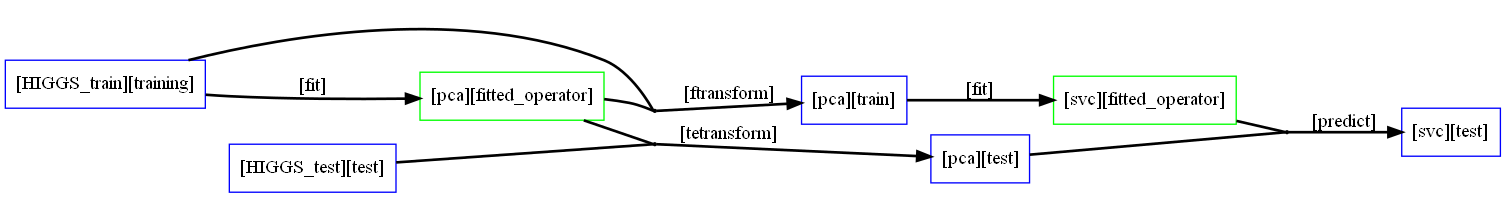

'HISKPCSKSV9009_predict'

In [20]:

user1_pipe = Pipeline([('pca', PCA(n_components=3)), ('svc', SVC())])
artifact_graph, request = extract_artifact_graph(data_id, user1_pipe)
graphviz_draw(artifact_graph, type='notebook',  mode='use_alias')
request

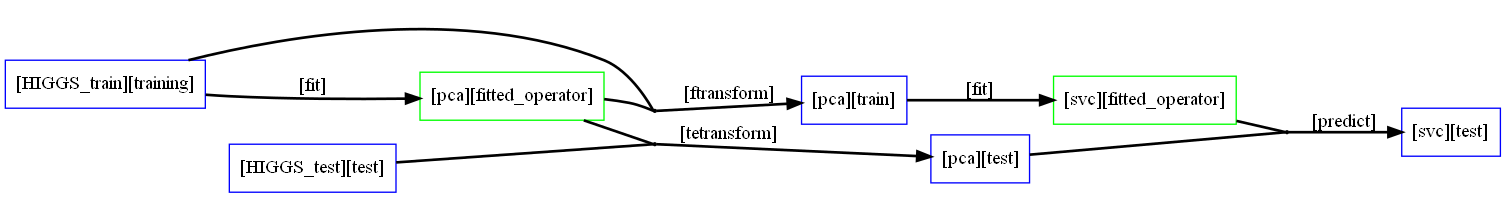

In [21]:
graphviz_draw(artifact_graph, type='notebook',  mode='use_alias')

### 2) Hyppo's History

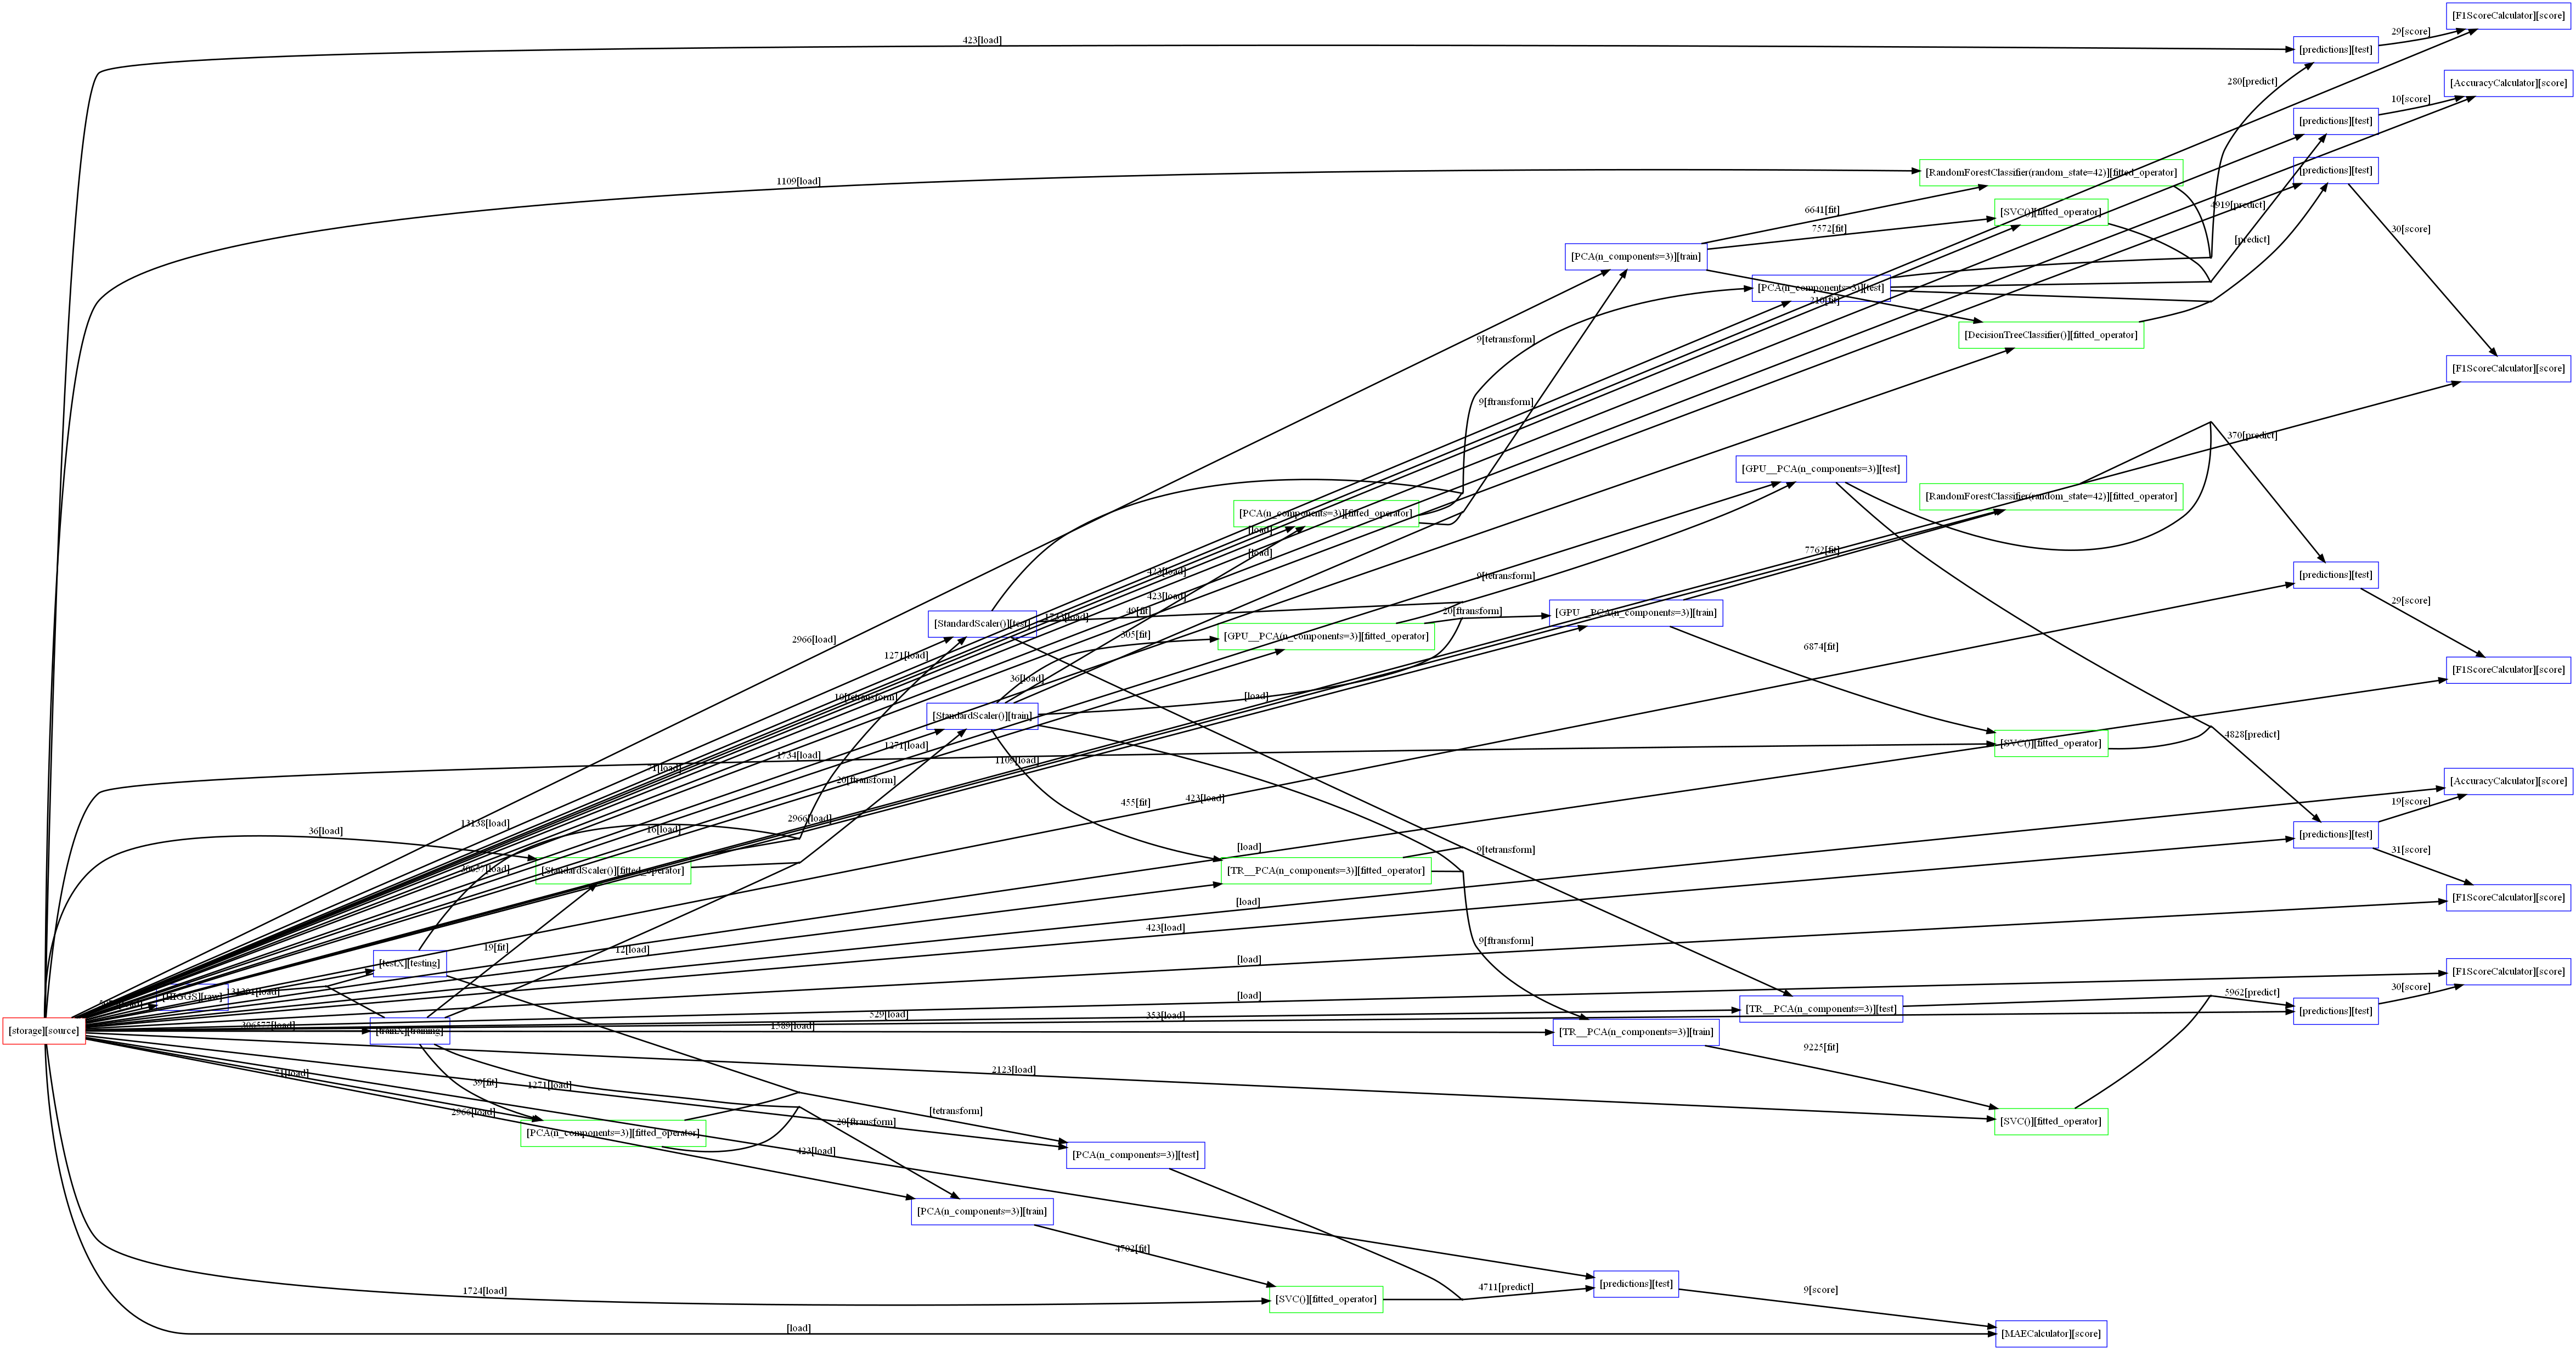

In [22]:
Hyppo.visualize(type='notebook', mode='use_alias')

### 3) Augmenter

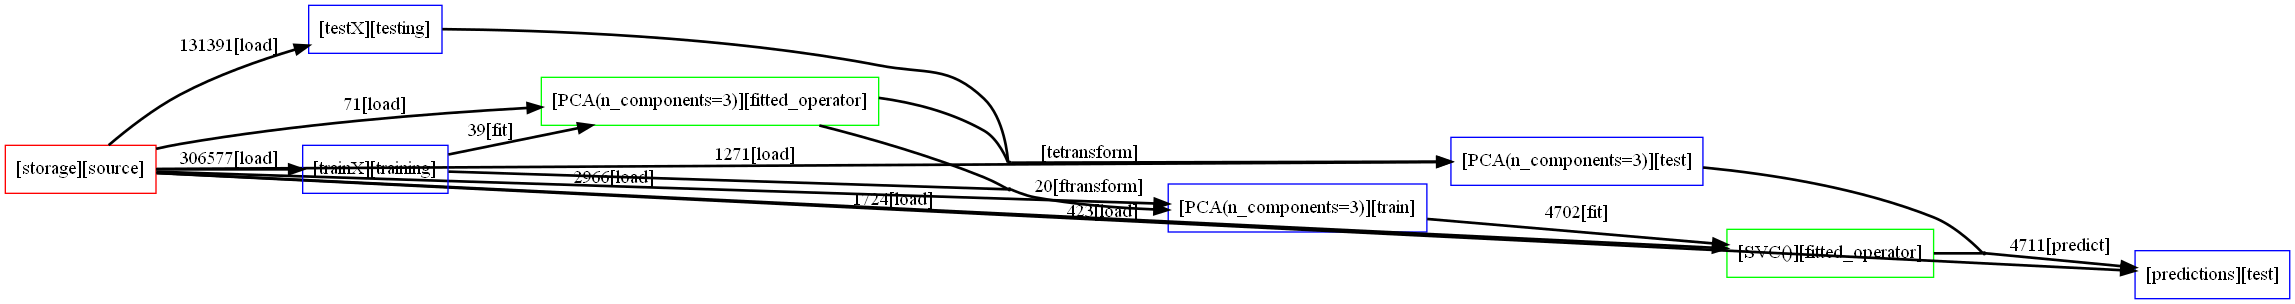

In [23]:
#History.printArtifacts() #HISKStSKPC4529_ftransform
Hyppo.visualize_augmented(data_id, type='notebook', mode='use_alias', filter_artifact_id="HISKPCSKSV9009_predict", filter = 'retrieve')

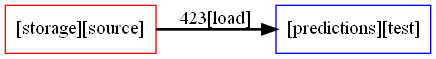

In [24]:
pipe = Hyppo.optimal_retrieval_plan(data_id,["HISKPCSKSV9009_predict"])
graphviz_draw(pipe[0][1], 'notebook','use_alias')

In [ ]:
pipe = Hyppo.optimal_retrieval_plan(data_id,["HISKPCSKSV9009_predict"])

In [25]:
plans= Hyppo.generate_plans(data_id, user1_pipe)

HISKPCSKSV9009_predict
['HISKPCSKSV9009_predict']


In [26]:
plans

[[423,
  ['HISKPCSKSV9009_predict']],
 [7706,
  ['HISKPCSKSV9009_predict']],
 [13650,
  ['HISKPCSKSV9009_predict']],
 [137897,
  ['HISKPCSKSV9009_predict']],
 [143841,
  ['HISKPCSKSV9009_predict']],
 [317352,
  ['HISKPCSKSV9009_predict']],
 [444442,
  ['HISKPCSKSV9009_predict']],
 [447543,
  ['HISKPCSKSV9009_predict']],
 [450386,
  ['HISKPCSKSV9009_predict']],
 [447511,
  ['HISKPCSKSV9009_predict']],
 [623897,
  ['HISKPCSKSV9009_predict']],
 [754088,
  ['HISKPCSKSV9009_predict']],
 [754056,
  ['HISKPCSKSV9009_predict']]]

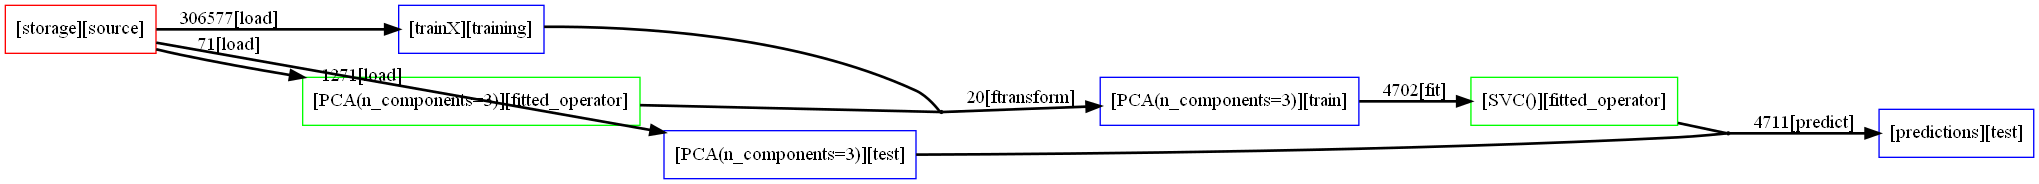

In [32]:
graphviz_draw(plans[5][1], 'notebook','use_alias')